## Erschließungsstrategien für unbekannten Wortschatz von DaF-Lernenden an spanischen Universitäten (2017-19)
# Datenanalyse (2)

##### Werkzeuge und Daten importieren

In [2]:
from funktionen import *
import pandas as pd
import matplotlib
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#import seaborn as sns
#sns.set(style="whitegrid") #"white", "darkgrid"...
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Daten = pd.read_pickle('D:\Daten\DISS\Daten\Estrategias_Estudiantes_2017-19_ber')

In [4]:
Daten = pd.read_pickle('D:\Daten\DISS\Daten\Estrategias_Estudiantes_Analyse')

In [5]:
gloss = pd.read_pickle('D:\Daten\DISS\Daten\Gloss2018')

##### Untergruppen und Listen für die Analyse

In [6]:
Liste_A_Q2 = [col for col in Daten.columns if 'A-Q2' in col]

In [7]:
Liste_A_Q3 = [col for col in Daten.columns if 'A-Q3' in col]

In [8]:
Liste_A_Q3.pop(3)

'A-Q3_3_TEXT'

In [9]:
Liste_A_Q4 = [col for col in Daten.columns if 'A-Q4' in col]

In [10]:
Liste_C_Q1 = [col for col in Daten.columns if 'C-Q1' in col]

In [11]:
Liste_Var = [col for col in Daten.columns if 'V_' in col]

In [12]:
Liste_Var

['V_L1-Bi/Trilingualismus',
 'V_Studienrichtung',
 'V_Studienjahr+Studium',
 'V_Niveau_DK',
 'V_Alter',
 'V_Geschlecht',
 'V_Erstsprache_Span',
 'V_Spr_Zahl',
 'V_Spr_Zahl_ges',
 'V_Spr_Fran',
 'V_Spr_Griech',
 'V_Spr_Latein',
 'V_Spr_Germ',
 'V_Spr_Rom',
 'V_Spr_Slaw',
 'V_Spr_Asiat',
 'V_E_Schule_LL',
 'V_E_Schule_Eng',
 'V_E_Schule_Spr',
 'V_E_Univ_DK',
 'V_E_Univ_andere',
 'V_E_Sprachschule',
 'V_E_DK_aktuell',
 'V_E_Sozial',
 'V_E_autonom',
 'V_Met_Erkl',
 'V_Met_Tipps',
 'V_Met_Training',
 'V_Met_Vgl',
 'V_Met_Reflexion',
 'V_Met_unbewusst']

In [13]:
Liste_Var.pop(2)

'V_Studienjahr+Studium'

In [14]:
Liste_Var.pop(3)

'V_Alter'

In [15]:
Liste_Var.pop(6)

'V_Spr_Zahl_ges'

##### Analyse...

In [16]:
#def get_good_str(df):
#    df_good = df[((df[strat['S1']] >= 3).sum(axis=1) >= 2) & ((df[strat['S2']] >= 3).sum(axis=1) >= 2) & ((df[strat['S3']] >= 3).sum(axis=1) >= 2) & ((df[strat['S4']] >= 3).sum(axis=1) >= 4) & ((df[strat['S5']] >= 3).sum(axis=1) >= 2) & ((df[strat['S6']] >= 3).sum(axis=1) >= 3)]
#    return df_good.shape[0], (df_good.shape[0])/(df.shape[0])*100

In [17]:
#Stud_U1 = Finished[(Finished['B-Q2-1_1'] == 1) | (Finished['B-Q2-2_1'] == 1) | (Finished['B-Q2-3_1'] == 1) | (Finished['B-Q2-4_1'] == 1) | (Finished['B-Q2-5_1'] == 1) | (Finished['B-Q2-6_1'] == 1) | (Finished['B-Q2-7_1'] == 1)]
#Stud_U2 = Finished[(Finished['B-Q2-1_2'] == 1) | (Finished['B-Q2-2_2'] == 1) | (Finished['B-Q2-3_2'] == 1) | (Finished['B-Q2-4_2'] == 1) | (Finished['B-Q2-5_2'] == 1) | (Finished['B-Q2-6_2'] == 1) | (Finished['B-Q2-7_2'] == 1)]
#Stud_U3 = Finished[(Finished['B-Q2-1_3'] == 1) | (Finished['B-Q2-2_3'] == 1) | (Finished['B-Q2-3_3'] == 1) | (Finished['B-Q2-4_3'] == 1) | (Finished['B-Q2-5_3'] == 1) | (Finished['B-Q2-6_3'] == 1) | (Finished['B-Q2-7_3'] == 1)]
#Stud_U4 = Finished[(Finished['B-Q2-1_4'] == 1) | (Finished['B-Q2-2_4'] == 1) | (Finished['B-Q2-3_4'] == 1) | (Finished['B-Q2-4_4'] == 1) | (Finished['B-Q2-5_4'] == 1) | (Finished['B-Q2-6_4'] == 1) | (Finished['B-Q2-7_4'] == 1)]
#Stud_U5 = Finished[(Finished['B-Q2-1_5'] == 1) | (Finished['B-Q2-2_5'] == 1) | (Finished['B-Q2-3_5'] == 1) | (Finished['B-Q2-4_5'] == 1) | (Finished['B-Q2-5_5'] == 1) | (Finished['B-Q2-6_5'] == 1) | (Finished['B-Q2-7_5'] == 1)]
#Stud_U6 = Finished[(Finished['B-Q2-1_6'] == 1) | (Finished['B-Q2-2_6'] == 1) | (Finished['B-Q2-3_6'] == 1) | (Finished['B-Q2-4_6'] == 1) | (Finished['B-Q2-5_6'] == 1) | (Finished['B-Q2-6_6'] == 1) | (Finished['B-Q2-7_6'] == 1)]

In [18]:
FA_weights = pd.read_excel('D:\Daten\DISS\Daten\FA_weights.xlsx')

In [19]:
A = FA_weights.drop(FA_weights.columns[0], axis=1).values
B = Daten[Liste_A_Q3].values
C = B.dot(A)
Df_C = pd.DataFrame(C, columns=FA_weights.columns[1:], index=Daten[Liste_A_Q3].index)

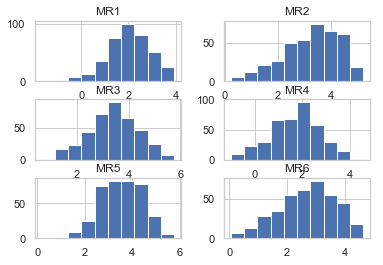

In [23]:
Df_C.hist();

In [20]:
Daten_total = pd.concat([Daten, Df_C], axis=1, join='outer', sort=False)

In [34]:
X = Df_C
y = Daten.V_Alter

In [35]:
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

lda = LinearDiscriminantAnalysis()
lda.fit(X,y)

x_new = lda.transform(X)

In [36]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    #plt.scatter(xs * scalex,ys * scaley, c = y) #with scaling
    plt.scatter(xs ,ys, c = y) #without scaling
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

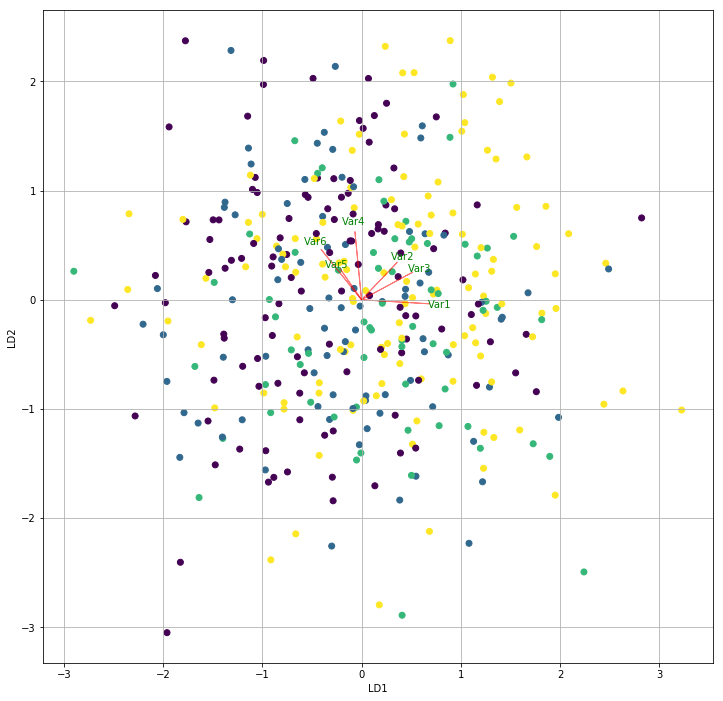

In [37]:
plt.figure(figsize=(12,12))
plt.xlabel("LD{}".format(1))
plt.ylabel("LD{}".format(2))
plt.grid()

myplot(x_new[:,0:2], lda.scalings_) 
plt.show()

In [45]:
X = Df_C
y = Daten.V_E_Univ_DK

In [46]:
lda = LinearDiscriminantAnalysis()
lda.fit(X,y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [51]:
lda.coef_

array([[-4.91478637e-01, -1.04475715e-01,  1.09213678e-04,
        -2.53380518e-01, -5.18520281e-02,  3.17369953e-01]])

In [52]:
X.columns

Index(['MR2', 'MR4', 'MR1', 'MR5', 'MR6', 'MR3'], dtype='object')

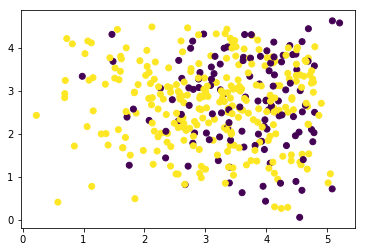

In [54]:
plt.scatter(Df_C.MR2 ,Df_C.MR6, c = y)

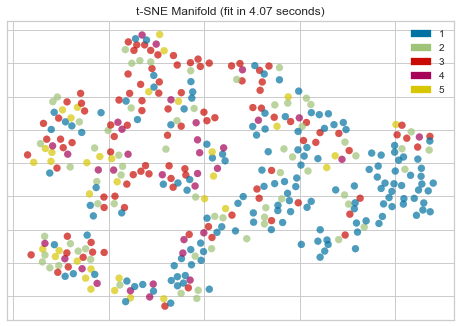

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X = Df_C
y = Daten.V_Niveau_DK

model = Pipeline([
    ("selectk", SelectKBest(k=2, score_func=f_classif)),
    ("viz", Manifold(manifold='tsne', target='discrete', n_neighbors=10, random_state = 34)),
])

model.fit(X, y)
model.named_steps['viz'].poof()